<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/edgar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr
import math
import numpy as np
from matplotlib import pyplot as plt

     |████████████████████████████████| 4.3MB 1.4MB/s 
     |████████████████████████████████| 296kB 18.6MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 2s (178 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb .

In [34]:
url = 'https://thredds.met.no/thredds/dodsC/metpplatest/met_forecast_1_0km_nordic_latest.nc'
forc = xr.open_dataset(url)

In [35]:
forc.air_temperature_2m


<xarray.DataArray 'air_temperature_2m' (time: 59, y: 2321, x: 1796)>
[245942444 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2020-10-22T18:00:00 ... 2020-10-25T04:00:00
  * x          (x) float64 -8.974e+05 -8.964e+05 ... 8.966e+05 8.976e+05
  * y          (y) float64 -1.104e+06 -1.103e+06 ... 1.215e+06 1.216e+06
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Attributes:
    units:          K
    standard_name:  air_temperature
    grid_mapping:   projection_lcc
    _ChunkSizes:    [   1   31 1796]

RuntimeError: ignored

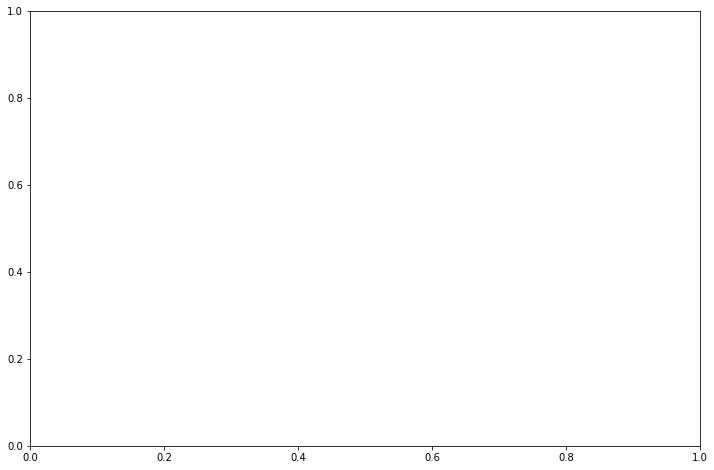

In [36]:
#forc.air_temperature_2m
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(forc.time,forc.air_temperature_2m[:,1000,1000])

In [23]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [27]:
[ix,jx] = findindex(forc.latitude,forc.longitude,60.274365,11.180386) # Råholt

In [29]:
jx

687

RuntimeError: ignored

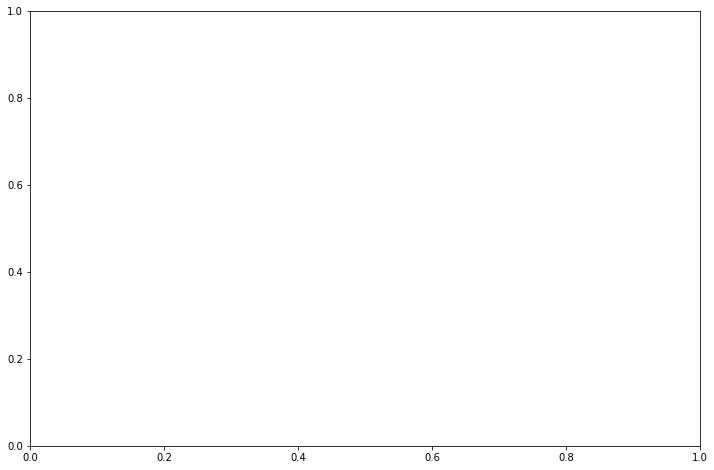

In [32]:
#forc.air_temperature_2m
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(forc.time,forc.air_temperature_2m[:,100,100])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'extemd'


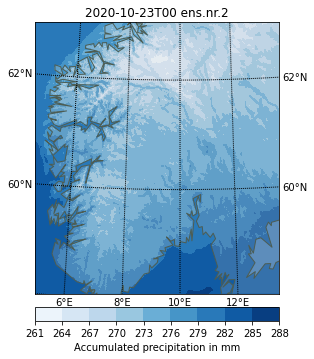

In [22]:

from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep_1=6
mlevel=0
memb1=2 # Ensemble member
memb2 = 4
memb3 = 6
memb4 = 8

fig = plt.figure(figsize=(10,10)) #11.7
fig.tight_layout()
gs = gridspec.GridSpec(2,2)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.0, urcrnrlat=63.0, llcrnrlon=5.0, urcrnrlon=14.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forc.longitude),np.array(forc.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forc.air_temperature_2m[timestep_1,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forc.time[timestep_1],unit='h')+" ens.nr."+str(memb1))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')      

## New forecast

In [11]:
url = 'https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc'
forc = xr.open_dataset(url)

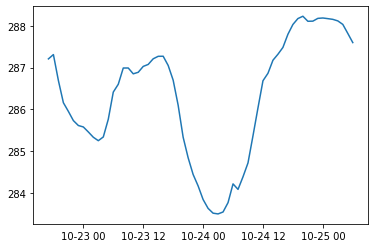

In [14]:
forc.air_temperature_2m

plt.plot(forc.time,forc.air_temperature_2m[:,0,10,100,100])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'extemd'


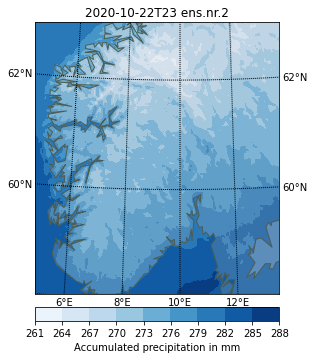

In [19]:

from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep_1=6
mlevel=0
memb1=2 # Ensemble member
memb2 = 4
memb3 = 6
memb4 = 8

fig = plt.figure(figsize=(10,10)) #11.7
fig.tight_layout()
gs = gridspec.GridSpec(2,2)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.0, urcrnrlat=63.0, llcrnrlon=5.0, urcrnrlon=14.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forc.longitude),np.array(forc.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forc.air_temperature_2m[timestep_1,mlevel,memb1,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forc.time[timestep_1],unit='h')+" ens.nr."+str(memb1))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')      